## Assignment 27.1
### ACD MDS (Mar 2018 batch) Student: K. Anandaranga
### PROJECT 3 - CLASSIFICATION MODELS

In [1]:
# Census data from https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
# Problem 1:
#    Prediction task is to determine whether a person makes over 50K a year.
# Problem 2:
#    Which factors are important
# Problem 3:
#    Which algorithms are best for this dataset

#### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline

pd.options.display.max_columns = 999

In [3]:
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score


#### Import dataset

In [4]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)


In [5]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
              'hours_per_week','native_country', 'wage_class']

In [6]:
train_set.columns = col_labels
test_set.columns = col_labels

In [7]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
print ("Train data shape: ", train_set.shape)
print ("Test data shape:  ", test_set.shape)

Train data shape:  (32561, 15)
Test data shape:   (16281, 15)


#### ML models require NUMERIC variables...so, need to convert all the 'Object' variables into numeric

In [10]:
train_obj_cols = train_set.dtypes[train_set.dtypes == 'object'].index
test_obj_cols = test_set.dtypes[test_set.dtypes == 'object'].index

print ("Object columns in TRAIN = ", train_obj_cols)
print ("Object columns in TEST = ", test_obj_cols)


Object columns in TRAIN =  Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype='object')
Object columns in TEST =  Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype='object')


In [11]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
train_set.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [13]:
train_set.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [14]:
train_set.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [15]:
train_set.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [16]:
train_set.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [17]:
train_set.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [18]:
train_set.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [19]:
train_set.wage_class.value_counts()

 <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64

In [20]:
test_set.wage_class.value_counts()

 <=50K.    12435
 >50K.      3846
Name: wage_class, dtype: int64

#### Map of categorical variables to Numeric

In [21]:

map_workclass = {' Private': 1, ' Self-emp-not-inc':2, ' Local-gov':3, ' ?':4, ' State-gov':5, ' Self-emp-inc':6, ' Federal-gov':7, ' Without-pay':8, ' Never-worked':9}

map_education = {' HS-grad': 1, ' Some-college':2, ' Bachelors':3, ' Masters':4, ' Assoc-voc':5, ' 11th':6, ' Assoc-acdm':7, ' 10th':8, ' 7th-8th':9, ' Prof-school':10, ' 9th':11, ' 12th':12, ' Doctorate':13, ' 5th-6th':14,' 1st-4th':15,' Preschool':16}

map_marital = {' Married-civ-spouse': 1, ' Never-married':2, ' Divorced':3, ' Separated':4, ' Widowed':5, ' Married-spouse-absent':6, ' Married-AF-spouse':7}

map_relation = {' Husband': 1, ' Not-in-family': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5, ' Other-relative': 6 }


map_country = {' United-States': 1, ' Mexico': 2 ,' ?': 3, ' Philippines': 4, ' Germany': 5, ' Canada': 6, ' Puerto-Rico': 7, ' El-Salvador': 8, 
               ' India': 9, ' Cuba': 10, ' England': 11, ' Jamaica': 12, ' South': 13, ' China': 14, ' Italy': 15, ' Dominican-Republic': 16, 
               ' Vietnam': 17, ' Guatemala': 18, ' Japan': 19, ' Poland': 20, ' Columbia': 21, ' Taiwan': 22, ' Haiti': 23, ' Iran': 24, ' Portugal': 25, 
               ' Nicaragua': 26, ' Peru': 27, ' France': 28, ' Greece': 29, ' Ecuador': 30, ' Ireland': 31, ' Hong': 32, ' Trinadad&Tobago': 33, 
               ' Cambodia': 34, ' Laos': 35, ' Thailand': 36, ' Yugoslavia': 37, ' Outlying-US(Guam-USVI-etc)': 38, ' Honduras': 39, ' Hungary': 40 ,
               ' Scotland': 41, ' Holand-Netherlands': 42
              }

map_occupation = {' Prof-specialty': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Adm-clerical': 4, ' Sales': 5,
                  ' Other-service': 6, ' Machine-op-inspct': 7, ' ?': 8, ' Transport-moving': 9, ' Handlers-cleaners': 10 ,
                  ' Farming-fishing': 11, ' Tech-support': 12, ' Protective-serv': 13, ' Priv-house-serv': 14, ' Armed-Forces': 15
                 }

map_race = {' White': 1, ' Black': 2, ' Asian-Pac-Islander': 3, ' Amer-Indian-Eskimo': 4, ' Other': 5 }

map_sex = {' Male': 1, ' Female': 2 }

map_wage = {' <=50K': 0, ' >50K': 1}

map_wage_test = {' <=50K.': 0, ' >50K.': 1}  # Note that there is an additional 'dot' in the test dataset, so need a separate mapping


#### Assign the same mapping to both the TRAIN and TEST datasets

In [22]:
train_set.replace({'workclass':map_workclass, 'education':map_education, 'marital_status':map_marital ,'relationship':map_relation , 
                  'native_country':map_country, 'race':map_race, 'sex':map_sex, 'occupation':map_occupation, 'wage_class':map_wage} , 
                  inplace = True)

test_set.replace({'workclass':map_workclass, 'education':map_education, 'marital_status':map_marital ,'relationship':map_relation , 
                  'native_country':map_country, 'race':map_race, 'sex':map_sex, 'occupation':map_occupation, 'wage_class':map_wage_test} , 
                  inplace = True)

#### Validate that both TRAIN and TEST datasets are fully NUMERIC

In [23]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int64
fnlwgt            32561 non-null int64
education         32561 non-null int64
education_num     32561 non-null int64
marital_status    32561 non-null int64
occupation        32561 non-null int64
relationship      32561 non-null int64
race              32561 non-null int64
sex               32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null int64
wage_class        32561 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [24]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null int64
fnlwgt            16281 non-null int64
education         16281 non-null int64
education_num     16281 non-null int64
marital_status    16281 non-null int64
occupation        16281 non-null int64
relationship      16281 non-null int64
race              16281 non-null int64
sex               16281 non-null int64
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null int64
wage_class        16281 non-null int64
dtypes: int64(15)
memory usage: 1.9 MB


#### Now, assign independent and dependent variables for both TRAIN and TEST

In [25]:
x_train = train_set.drop('wage_class', axis=1)
y_train = train_set['wage_class']

x_test = test_set.drop('wage_class', axis=1)
y_test = test_set['wage_class']

#### Feature Selection using RandomForest

In [26]:
rndf = RandomForestClassifier(n_estimators=150)
rndf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [27]:
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': rndf.feature_importances_})

In [28]:
importance = importance.sort_values(by='importance', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

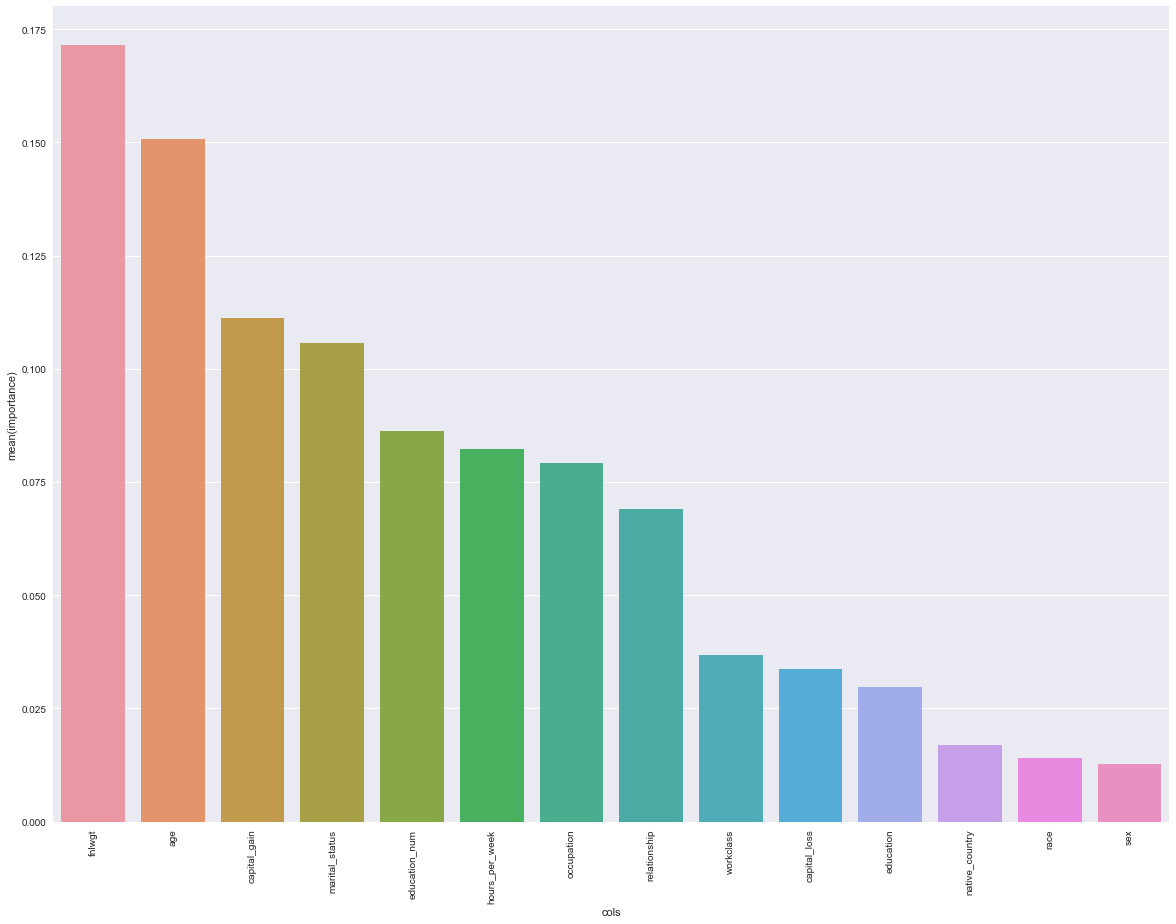

In [29]:
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [30]:
imp_cols = importance[importance.importance >= 0.05].cols.values
imp_cols

array(['fnlwgt', 'age', 'capital_gain', 'marital_status', 'education_num',
       'hours_per_week', 'occupation', 'relationship'], dtype=object)

#### Among all the independent variables, there are 8 that are important
#### Since we are only dealing with 14 total variables, I've decided to keep all the variables for modeling

#### Model Selection

In [31]:
names = ["Decision Tree", "Random Forest", "AdaBoost", "Logistic", "GBM"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=100)]

In [32]:
for clf in zip(names, classifiers):
    clf[1].fit(x_train, y_train) #[imp_cols]
    print(clf[0], clf[1].score(x_test, y_test))

Decision Tree 0.852097537006
Random Forest 0.854247282108
AdaBoost 0.861986364474
Logistic 0.806400098274
GBM 0.86972544684


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
for clf in zip(names, classifiers):
    print(clf[0])
    pred = clf[1].predict(x_test)
    print(confusion_matrix(pred, y_test))
    print(classification_report(pred, y_test))
    print('*'*20)

Decision Tree
[[11868  1841]
 [  567  2005]]
             precision    recall  f1-score   support

          0       0.95      0.87      0.91     13709
          1       0.52      0.78      0.62      2572

avg / total       0.89      0.85      0.86     16281

********************
Random Forest
[[11561  1499]
 [  874  2347]]
             precision    recall  f1-score   support

          0       0.93      0.89      0.91     13060
          1       0.61      0.73      0.66      3221

avg / total       0.87      0.85      0.86     16281

********************
AdaBoost
[[11686  1498]
 [  749  2348]]
             precision    recall  f1-score   support

          0       0.94      0.89      0.91     13184
          1       0.61      0.76      0.68      3097

avg / total       0.88      0.86      0.87     16281

********************
Logistic
[[12090  2807]
 [  345  1039]]
             precision    recall  f1-score   support

          0       0.97      0.81      0.88     14897
          1    

##### GBM provides the highest prediction accuracy at ~ 87% and is the preferred model

#### Q1) Prediction of wage rate
             5 models - "Decision Tree", "Random Forest", "AdaBoost", "Logistic", "GBM" - were explored

#### Q2) Important factors
             8 factors were imporant - ['fnlwgt', 'age', 'capital_gain', 'marital_status', 'education_num',
       'hours_per_week', 'occupation', 'relationship']

#### Q3) Best prediction model?
             GBM with 87% accuracy